In [12]:
from algorithms.matrix_free_rsvd import MatrixFreeRSVD, tikhonov_solver, get_approximate_W
from utils.mesh_utils import get_square_f
from fenics import UnitSquareMesh, FunctionSpace, Function, plot

In [7]:
# Function space
n = 256
mesh = UnitSquareMesh(n, n)
V_h = FunctionSpace(mesh, 'CG', 1)

rsvd = MatrixFreeRSVD(V_h)
x0, y0, width, height = 0., 0., 0.15, 0.15
f = get_square_f(V_h, x0, y0, w=width, h=height)
x = f.vector().get_local()
y = rsvd.apply_K(x)

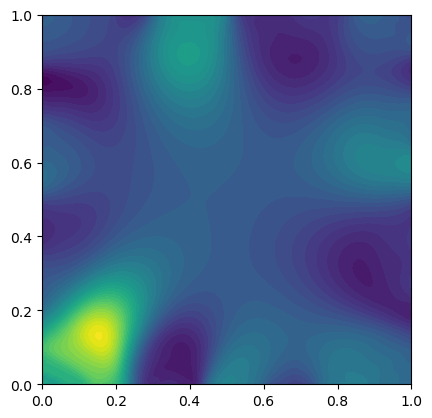

In [13]:
k = 10
Uk, Sk, VkT = rsvd.mf_rsvd(k=k)
w = get_approximate_W(VkT.T, rsvd.M_dx)
x = tikhonov_solver(rsvd, w, y, lambda_=1e-4)

f = Function(V_h)
f.vector()[:] = x
plot(f)